In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

data_dir = './original_dataset/training'
data_dir = pathlib.Path(data_dir)
data_valid_dir = './original_dataset/validation'

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8483


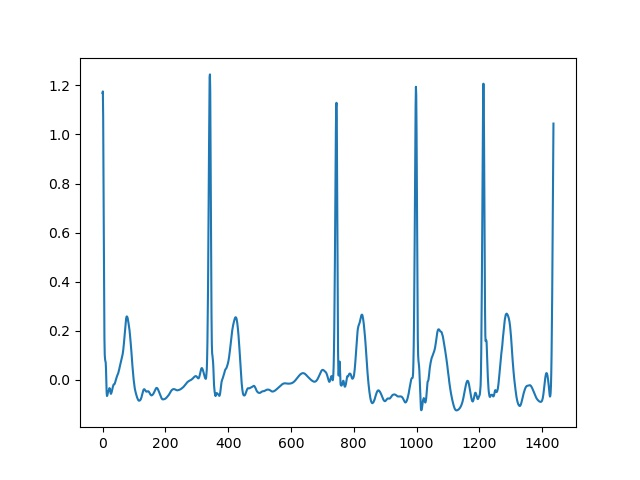

In [4]:
af = list(data_dir.glob('A/*'))
PIL.Image.open(str(af[0]))

In [5]:
batch_size = 32
img_height = 320
img_width = 320

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8483 files belonging to 4 classes.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 297 files belonging to 4 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['A', 'N', 'O', '~']


In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 320, 320, 3)
(32,)


In [10]:
for image_batch, labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 320, 320, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE
print(AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

-1


In [12]:
normalization_layer = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 320, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 320, 320, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 160, 160, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 64)        0

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
266/266 [==============================] - 14s 32ms/step - loss: 1.0563 - accuracy: 0.5909 - val_loss: 1.0638 - val_accuracy: 0.5253
Epoch 2/10
266/266 [==============================] - 8s 29ms/step - loss: 0.8523 - accuracy: 0.6230 - val_loss: 0.8905 - val_accuracy: 0.5892
Epoch 3/10
266/266 [==============================] - 8s 29ms/step - loss: 0.8088 - accuracy: 0.6481 - val_loss: 0.8924 - val_accuracy: 0.6027
Epoch 4/10
266/266 [==============================] - 8s 29ms/step - loss: 0.7697 - accuracy: 0.6673 - val_loss: 0.8236 - val_accuracy: 0.6498
Epoch 5/10
266/266 [==============================] - 8s 29ms/step - loss: 0.7187 - accuracy: 0.6981 - val_loss: 0.6915 - val_accuracy: 0.7475
Epoch 6/10
266/266 [==============================] - 8s 29ms/step - loss: 0.6586 - accuracy: 0.7299 - val_loss: 0.5942 - val_accuracy: 0.7946
Epoch 7/10
266/266 [==============================] - 8s 29ms/step - loss: 0.5888 - accuracy: 0.7546 - val_loss: 0.5075 - val_accuracy: 0.841

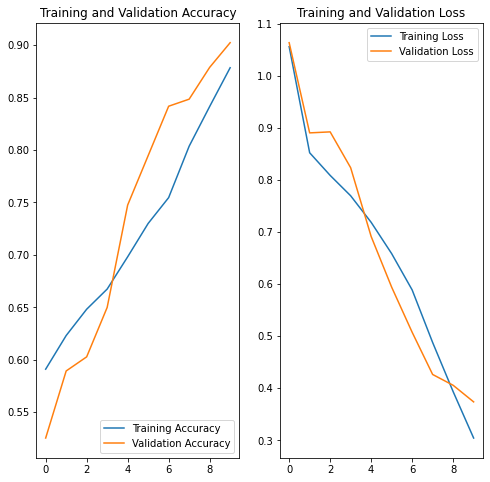

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()